In [1]:
import sys
sys.path.insert(1, '/home/afkirby/Analysis')

In [2]:
from read_penguin import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from Interpolate import *
from Search import binSearch
import multiprocessing as mp
from Transform import *

In [3]:
#Loading Data
xres = 384
yres = 768
data = load_2D_data("/scratch/afkirby/2DIso/", xres, yres, "h50_1p1J_e0_PPM4", 100)

In [4]:
#Planetary Coordinates/Velocity
planetCoords = (1, np.pi)
planetCoordsCart = geo.sphericalToCartesian(planetCoords, dim = 2)
planetVel = (0, 1)
planetVelCart = geo.sphericalToCartesianVelocity(planetCoords, planetVel, dim = 2)

In [5]:
#Creating Planet-Centric Polar Grid
velPlanetR = np.ndarray((101, 101))
velPlanetTheta = np.ndarray((101, 101))
planetR = np.ndarray(101)
planetTheta = np.ndarray(101)
for i in range(101):
    planetR[i] = 0.2*i/(100)
for j in range(101):
    planetTheta[j] = 2*np.pi*j/(100)
    
for i in range(101):
    for j in range(101):
        v = findVel2D(planetR[i], planetTheta[j], data, planetCoords, planetVel, corot = True, cart = False)
        velPlanetR[i,j] = v[0]
        velPlanetTheta[i,j] = v[1]

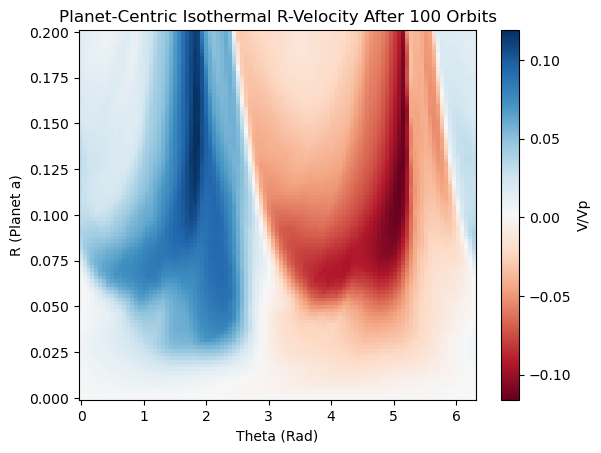

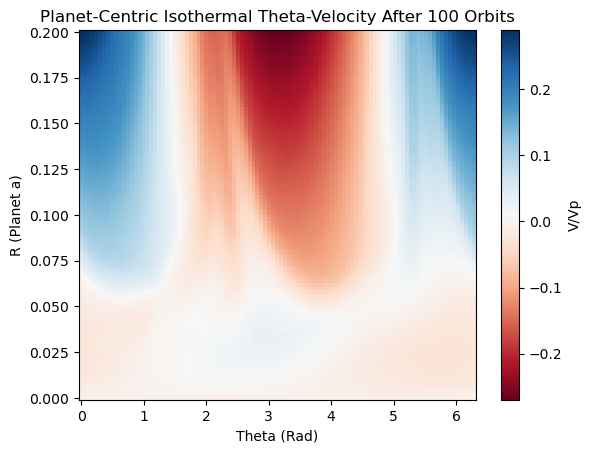

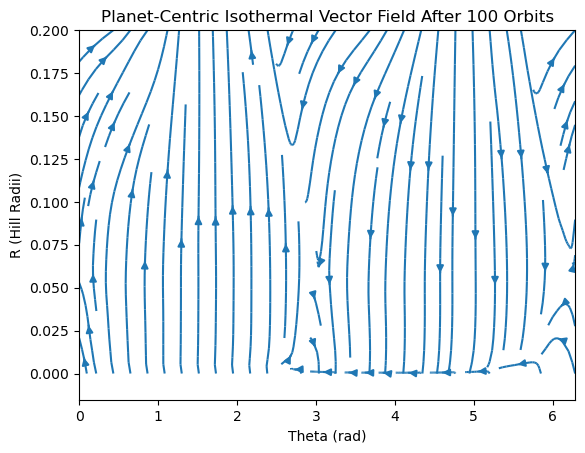

In [6]:
plt.figure()
plt.pcolor(planetTheta, planetR, velPlanetR, cmap = "RdBu")
plt.title("Planet-Centric Isothermal R-Velocity After 100 Orbits")
plt.xlabel("Theta (Rad)")
plt.ylabel("R (Planet a)")
plt.colorbar(label = 'V/Vp')
plt.show()

plt.figure()
plt.pcolor(planetTheta, planetR, velPlanetTheta, cmap = "RdBu")
plt.title("Planet-Centric Isothermal Theta-Velocity After 100 Orbits")
plt.xlabel("Theta (Rad)")
plt.ylabel("R (Planet a)")
plt.colorbar(label = 'V/Vp')
plt.show()

plt.figure()
plt.streamplot(planetTheta, planetR, velPlanetTheta, velPlanetR)
plt.title("Planet-Centric Isothermal Vector Field After 100 Orbits")
plt.ylabel("R (Hill Radii)")
plt.xlabel("Theta (rad)")
#plt.savefig("PolarFlowAroundPlanet.png")
plt.show()

In [7]:
planetX = [-0.2 + 0.2*i/100 for i in range(201)]
planetY = [-0.2 + 0.2*i/100 for i in range(201)]
velPlanetX = np.ndarray((201,201))
velPlanetY = np.ndarray((201,201))
for i in range(201):
    for j in range(201):
        pCoords = (planetX[i], planetY[j])
        #starCoords = np.array(pCoords) + np.array(planetCoordsCart)
        polar = geo.cartesianToSpherical(pCoords)
        v = findVel2D(polar[0], polar[1], data, planetCoords, planetVel, corot = True, cart = True)
        #v = geo.sphericalToCartesianVelocity(geo.cartesianToSpherical(starCoords), vsphere, dim = 2)
        velPlanetX[j,i] = v[0]
        velPlanetY[j,i] = v[1]

/home/afkirby/Analysis/Geometry.py:28: RuntimeWarning: invalid value encountered in scalar divide
  phi = np.arccos(z/r)


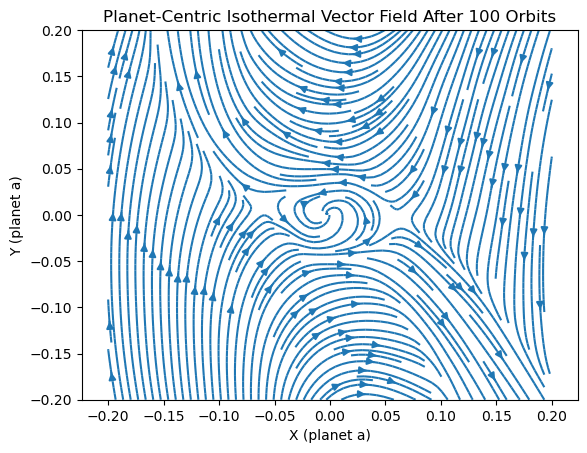

In [8]:
plt.figure()
plt.streamplot(planetX, planetY, velPlanetX, velPlanetY, density = 2)
plt.title("Planet-Centric Isothermal Vector Field After 100 Orbits")
plt.ylabel("Y (planet a)")
plt.xlabel("X (planet a)")
#plt.savefig("PolarFlowAroundPlanet.png")
plt.show()